In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
import read_reports as rr
#import Differentiated_Body_Composition_Tracker as dbct


sol_to_earth = 332946.078
m_pl = 2.793176e-08 * sol_to_earth
m_emb = 2.793176e-07 * sol_to_earth
min_frag_mass = 0.5 * m_pl

In [3]:
anna_old_tt, anna_old_n = rr.extract_data_outfile('/home/tajer.1/rebound/examples/data/Anna.out')
anna_old_v, anna_old_b = rr.extract_data_impact('/home/tajer.1/rebound/examples/data/Anna.out')

In [4]:
anna_df = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/data/Anna.out')
honey_df = rr.extract_data_outfile_full('/home/tajer.1/planetgarten/energy_dist/run8.out')

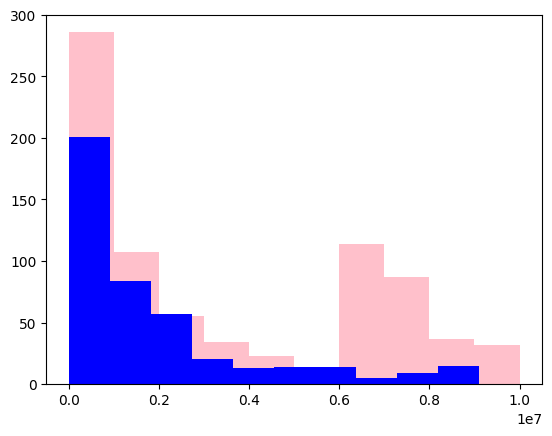

In [5]:
plt.hist(anna_df['time'], color = 'pink')
plt.hist(honey_df['time'], color = 'blue')
plt.show()

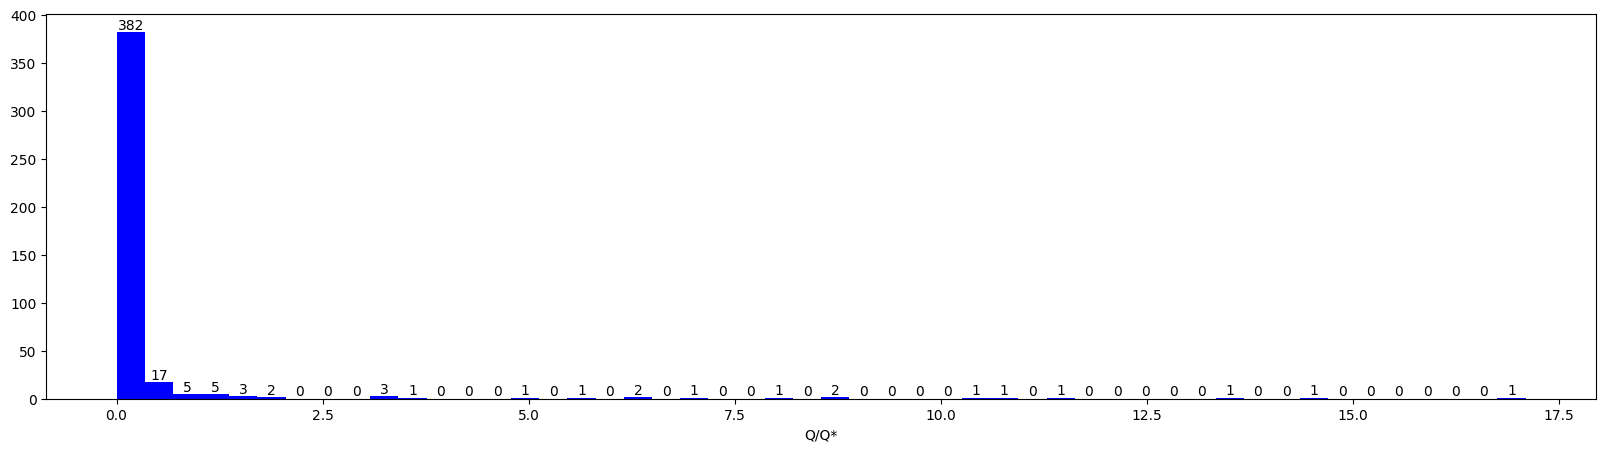

Bin Edges: [ 0.        0.341866  0.683732  1.025598  1.367464  1.70933   2.051196
  2.393062  2.734928  3.076794  3.41866   3.760526  4.102392  4.444258
  4.786124  5.12799   5.469856  5.811722  6.153588  6.495454  6.83732
  7.179186  7.521052  7.862918  8.204784  8.54665   8.888516  9.230382
  9.572248  9.914114 10.25598  10.597846 10.939712 11.281578 11.623444
 11.96531  12.307176 12.649042 12.990908 13.332774 13.67464  14.016506
 14.358372 14.700238 15.042104 15.38397  15.725836 16.067702 16.409568
 16.751434 17.0933  ]


In [6]:
plt.figure(figsize=(20,5))

Q1 = honey_df['Q/Q*']
Q2 = anna_df['Q/Q*']

# Create the histogram and get the counts and bin edges
counts, bin_edges, _ = plt.hist(Q1, bins=50, color = 'blue')

# Add counts on top of each bar
for i in range(len(counts)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i]) / 2, counts[i], 
             f'{int(counts[i])}', ha='center', va='bottom', fontsize=10)

# Show the plot

plt.xlabel('Q/Q*')
plt.show()
print("Bin Edges:", bin_edges)


In [7]:
honey_gamma = honey_df['Mp/Mt']
anna_gamma = anna_df['Mp/Mt']
for i in range(0, len(honey_gamma)):
    if honey_gamma[i] == 0:
        honey_gamma[i] = 0.00001
        
for i in range(0, len(anna_gamma)):
    if anna_gamma[i] == 0:
        anna_gamma[i] = 0.00001

honey_mp_ratio = 1/(1+(1/honey_gamma))
anna_mp_ratio = 1/(1+(1/anna_gamma))

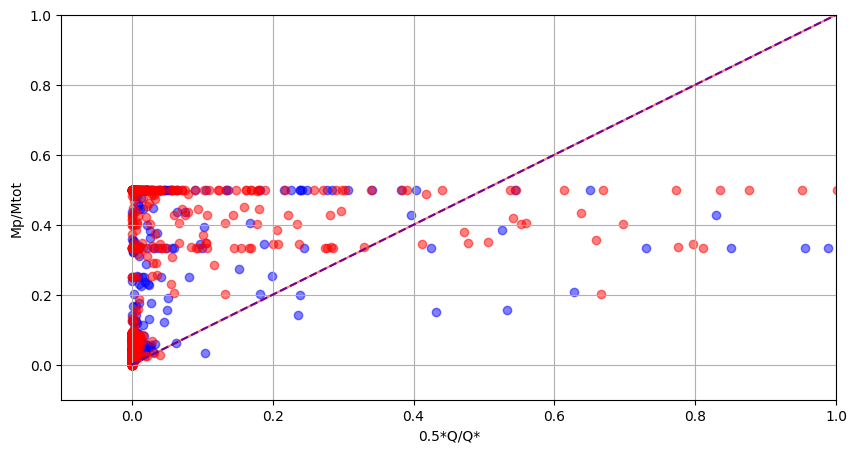

In [8]:
plt.figure(figsize=(10,5))

honey_half_Q = 0.5 * honey_df['Q/Q*']
anna_half_Q = 0.5 * anna_df['Q/Q*']
plt.scatter(honey_half_Q, honey_mp_ratio, color = 'blue', alpha=0.5, label='honey')
plt.scatter(anna_half_Q, anna_mp_ratio, color = 'red', alpha=0.5, label = 'Anna')
plt.plot([np.min(honey_half_Q), np.max(honey_half_Q)], [np.min(honey_half_Q), np.max(honey_half_Q)], 'b--', label="y = x honey")
plt.plot([np.min(anna_half_Q), np.max(anna_half_Q)], [np.min(anna_half_Q), np.max(anna_half_Q)], 'r', alpha = 0.5, label="y = x honey")
#plt.plot([np.min(half_Q), np.max(half_Q)], [np.min(mp_ratio), np.max(mp_ratio)], color='grey', alpha=0.5)
plt.xlabel('0.5*Q/Q*')
plt.ylabel('Mp/Mtot')
plt.grid('True')
plt.ylim(-0.1,1)
plt.xlim(-0.1,1)
plt.show()

In [9]:
print(max(honey_half_Q))
print(max(anna_half_Q))

8.54665
35.6268


In [10]:
anna_df['type'].unique()

array(['SIMPLY MERGED', 'EFFECTIVELY MERGED', 'GRAZE AND MERGE',
       'ELASTIC BOUNCE', 'HEAD-ON SMASHED', 'GRAZING SMASHED',
       'HIT AND RUN'], dtype=object)

In [11]:
acc_h_df = honey_df[
    (honey_df['type'] == 'PARTIAL ACCRETION') | (honey_df['type'] == 'HIT AND RUN')
]

ero_h_df = honey_df[
    (honey_df['type'] == 'GRAZING PARTIAL EROSION') | (honey_df['type'] == 'SUPER-CATASTROPHIC') | (honey_df['type'] == 'PARTIAL EROSION')
]

acc_a_df = anna_df[
    (anna_df['type'] == 'HIT AND RUN')
]

ero_a_df = anna_df[
    (anna_df['type'] == 'HEAD-ON SMASHED') | (anna_df['type'] == 'GRAZING SMASHED')
]


In [12]:
honey_gamma = acc_h_df['Mp/Mt']
honey_gamma

49        1.0
73        1.0
170    0.2353
175       1.0
181    0.6667
191       1.0
218    0.5696
269    0.0643
287    0.7779
307    0.0636
310    0.1377
380    0.2936
401    0.7491
427    0.2913
Name: Mp/Mt, dtype: object

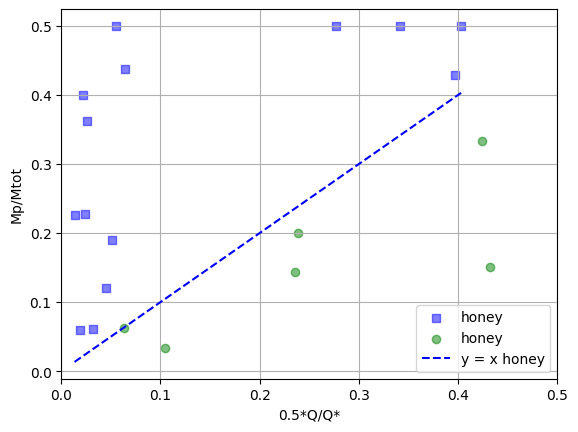

In [13]:
#gamma (Mp/Mt) for accretive colllisions
honey_gamma_acc = acc_h_df['Mp/Mt']
anna_gamma_acc = acc_a_df['Mp/Mt']
#gamma (Mp/Mt) for erosive colllisions
honey_gamma_ero = ero_h_df['Mp/Mt']
anna_gamma_ero = ero_a_df['Mp/Mt']

honey_mp_ratio_acc = 1/(1+(1/honey_gamma_acc))
anna_mp_ratio_acc = 1/(1+(1/anna_gamma_acc))
honey_mp_ratio_ero = 1/(1+(1/honey_gamma_ero))
anna_mp_ratio_ero = 1/(1+(1/anna_gamma_ero))

honey_half_Q_acc = 0.5 * acc_h_df['Q/Q*']
anna_half_Q_acc = 0.5 * acc_a_df['Q/Q*']

honey_half_Q_ero = 0.5 * ero_h_df['Q/Q*']
anna_half_Q_ero = 0.5 * ero_a_df['Q/Q*']

plt.scatter(honey_half_Q_acc, honey_mp_ratio_acc, color = 'blue', marker='s', alpha=0.5, label='honey')
#plt.scatter(anna_half_Q_acc, anna_mp_ratio_acc, color = 'red', alpha=0.5, marker = 's', label = 'Anna')

plt.scatter(honey_half_Q_ero, honey_mp_ratio_ero, color = 'green', marker='o', alpha=0.5, label='honey')
#plt.scatter(anna_half_Q_ero, anna_mp_ratio_ero, color = 'red', alpha=0.5, marker = 'o', label = 'Anna')

plt.xlim(0,0.5)

plt.plot([np.min(honey_half_Q_acc), np.max(honey_half_Q_acc)], [np.min(honey_half_Q_acc), np.max(honey_half_Q_acc)], 'b--', label="y = x honey")
#plt.plot([np.min(anna_half_Q), np.max(anna_half_Q)], [np.min(anna_half_Q), np.max(anna_half_Q)], 'r', alpha = 0.5, label="y = x honey")
plt.xlabel('0.5*Q/Q*')
plt.ylabel('Mp/Mtot')
plt.grid('True')
plt.legend()

In [14]:
m_acc = pd.to_numeric(acc_h_df['Mt'], errors='coerce') * sol_to_earth
m_ero = pd.to_numeric(ero_h_df['Mt'], errors='coerce') * sol_to_earth

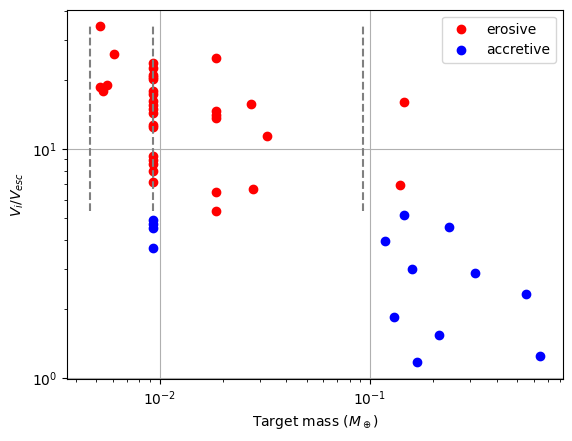

In [15]:
plt.plot([m_pl, m_pl], [np.min(ero_h_df['Vimp/Vesc']), np.max(ero_h_df['Vimp/Vesc'])], ls = '--', color='grey')
plt.plot([m_emb, m_emb], [np.min(ero_h_df['Vimp/Vesc']), np.max(ero_h_df['Vimp/Vesc'])], ls = '--', color='grey')
plt.plot([min_frag_mass, min_frag_mass], [np.min(ero_h_df['Vimp/Vesc']), np.max(ero_h_df['Vimp/Vesc'])], ls = '--', color='grey')
plt.scatter(m_ero, ero_h_df['Vimp/Vesc'], color = 'red', label = 'erosive')
plt.scatter(m_acc, acc_h_df['Vimp/Vesc'], color = 'blue', label='accretive')

plt.grid(True)
plt.xlabel(r'Target mass ($M_\oplus$)')
plt.ylabel(r'$V_{i}/V_{esc}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [16]:
low_mass = ero_h_df[pd.to_numeric(ero_h_df['Mt']) < (m_pl / sol_to_earth)]
low_mass

,time,hash_t,Mt,hash_p,Mp,Mp/Mt,Mlr/Mt,Mlr/Mtot,b/Rt,Vimp/Vesc,Q/Q*,type
68,92456.76,236,2.790000e-08,189,2.790000e-08,1.0,0.9132,0.4566,1.0493,7.2068,1.0868,GRAZING PARTIAL EROSION
112,224889.0,33,2.790000e-08,31,2.790000e-08,1.0,0.6998,0.3499,1.4253,12.7417,1.3002,GRAZING PARTIAL EROSION
158,591807.4,46,2.790000e-08,30,2.790000e-08,1.0,0.0773,0.0386,0.3556,9.3447,3.3937,SUPER-CATASTROPHIC
198,875628.2,32,2.790000e-08,3187199216,2.090000e-08,0.7491,0.2985,0.1707,0.9926,8.9854,1.6587,PARTIAL EROSION
222,1107942.0,145,2.790000e-08,1842102965,1.527762e-08,0.5476,0.0323,0.0209,0.4455,12.5041,5.1131,SUPER-CATASTROPHIC
229,1144383.0,170,2.790000e-08,3396227953,1.742500e-08,0.6246,0.015,0.0092,0.7294,17.9075,8.8245,SUPER-CATASTROPHIC
234,1189494.0,51,2.790000e-08,438292632,1.742500e-08,0.6246,0.0707,0.0435,1.0816,14.3345,3.1337,GRAZING PARTIAL EROSION
244,1265024.0,150,2.790000e-08,15308464,1.742500e-08,0.6246,0.771,0.4746,1.0541,8.0397,1.0508,GRAZING PARTIAL EROSION
263,1453660.0,1639799867,1.566250e-08,2723643411,1.527762e-08,0.9754,0.0346,0.0175,1.172,18.7232,5.7529,GRAZING PARTIAL EROSION
270,1571582.0,27,2.790000e-08,3321237907,2.090000e-08,0.7491,0.0087,0.0049,0.6997,20.9872,13.3535,SUPER-CATASTROPHIC


In [17]:
pd.to_numeric(ero_h_df['Mt'])

68     2.790000e-08
112    2.790000e-08
146    5.580000e-08
158    2.790000e-08
164    8.370000e-08
198    2.790000e-08
212    5.580000e-08
220    5.580000e-08
222    2.790000e-08
225    5.580000e-08
229    2.790000e-08
234    2.790000e-08
244    2.790000e-08
253    9.770000e-08
263    1.566250e-08
266    4.185000e-07
270    2.790000e-08
278    5.580000e-08
296    1.694012e-08
299    8.192152e-08
314    1.834339e-08
318    2.790000e-08
328    2.790000e-08
338    2.790000e-08
352    2.790000e-08
362    2.790000e-08
378    2.790000e-08
383    1.613195e-08
388    2.790000e-08
393    1.566250e-08
397    2.790000e-08
400    2.790000e-08
403    5.580000e-08
418    4.337129e-07
Name: Mt, dtype: float64

In [18]:
for i in range(0,len(honey_df)):
    if honey_mp_ratio[i] > honey_half_Q[i]:
        print(i)
        print(honey_df.loc[i,'type'])

0
EFFECTIVELY MERGED
1
GRAZE AND MERGE
2
EFFECTIVELY MERGED
3
EFFECTIVELY MERGED
4
GRAZE AND MERGE
5
GRAZE AND MERGE
6
GRAZE AND MERGE
7
EFFECTIVELY MERGED
8
ELASTIC BOUNCE
9
SIMPLY MERGED
10
EFFECTIVELY MERGED
11
SIMPLY MERGED
12
EFFECTIVELY MERGED
13
GRAZE AND MERGE
14
ELASTIC BOUNCE
15
GRAZE AND MERGE
16
GRAZE AND MERGE
17
GRAZE AND MERGE
18
ELASTIC BOUNCE
19
ELASTIC BOUNCE
20
EFFECTIVELY MERGED
21
EFFECTIVELY MERGED
22
GRAZE AND MERGE
23
GRAZE AND MERGE
24
GRAZE AND MERGE
25
EFFECTIVELY MERGED
26
EFFECTIVELY MERGED
27
SIMPLY MERGED
28
SIMPLY MERGED
29
EFFECTIVELY MERGED
30
ELASTIC BOUNCE
31
GRAZE AND MERGE
32
EFFECTIVELY MERGED
33
GRAZE AND MERGE
34
EFFECTIVELY MERGED
35
EFFECTIVELY MERGED
36
EFFECTIVELY MERGED
37
ELASTIC BOUNCE
38
ELASTIC BOUNCE
39
ELASTIC BOUNCE
40
EFFECTIVELY MERGED
41
EFFECTIVELY MERGED
42
GRAZE AND MERGE
43
EFFECTIVELY MERGED
44
ELASTIC BOUNCE
45
ELASTIC BOUNCE
46
EFFECTIVELY MERGED
47
ELASTIC BOUNCE
48
GRAZE AND MERGE
49
PARTIAL ACCRETION
50
ELASTIC BOUNCE
51

In [19]:
print(honey_df.iloc[1, :])

time                933.4302
hash_t                     5
Mt              2.790000e-07
hash_p                    71
Mp              2.790000e-08
Mp/Mt                    0.1
Mlr/Mt                1.0996
Mlr/Mtot              0.9996
b/Rt                  1.1571
Vimp/Vesc             1.0047
Q/Q*                  0.0007
type         GRAZE AND MERGE
Name: 1, dtype: object


In [20]:
pd.to_numeric(acc_h_df['Mt'])

49     2.790000e-08
73     2.790000e-08
170    4.743000e-07
175    2.790000e-08
181    5.022000e-07
191    3.906000e-07
218    6.402666e-07
269    4.341625e-07
287    9.486000e-07
307    7.129013e-07
310    3.543237e-07
380    1.664650e-06
401    2.790000e-08
427    1.939259e-06
Name: Mt, dtype: float64

/tmp/ipykernel_199743/1536758510.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


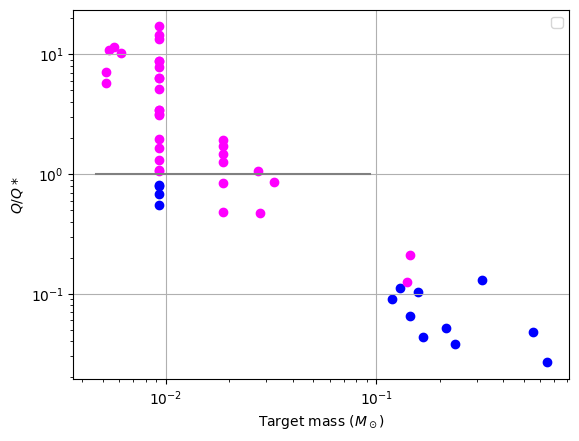

In [21]:
plt.scatter(pd.to_numeric(acc_h_df['Mt']) * sol_to_earth, acc_h_df['Q/Q*'], color = 'blue')
plt.scatter(pd.to_numeric(ero_h_df['Mt'])* sol_to_earth, ero_h_df['Q/Q*'], color = 'magenta')
plt.plot([min_frag_mass, m_emb], [1,1], color = 'grey')

plt.grid(True)
plt.xlabel(r'Target mass ($M_\odot$)')
plt.ylabel(r'$Q/Q*$')
plt.xscale('log')
plt.yscale('log')
plt.legend()